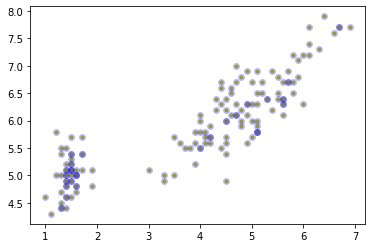

In [31]:
##BAR y LINE PLOTS

#ejemplo1
import pandas as pd
import matplotlib.pyplot as plt
# iris = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

#ejes
x = iris["petal_length"]
y = iris["sepal_length"]
# mas ejemplos parametros aqui: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot
plt.plot(x,y,'y.')
plt.plot(x,y,'bo',alpha=0.2)


<BarContainer object of 3 artists>

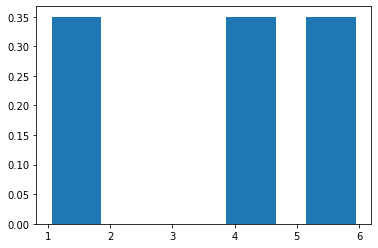

In [28]:
#ejemplo2
medias = iris.groupby("species")['petal_length'].mean() #mean() para medias
estadisticas= iris.groupby("species")['petal_length'].std() #std() para varianza
ancho_col=0.35
plt.bar(medias, ancho_col)

<BarContainer object of 3 artists>

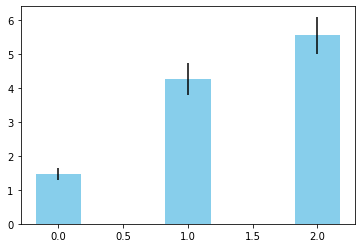

In [29]:
#ejemplo3
iris.dtypes #veremos que species es de tipo objeto .... asi que ....
iris['species'] = iris['species'].astype('category') #.... lo convertimo a categoria
iris.dtypes
import numpy as np
indices = np.unique(iris["species"].cat.codes)
plt.bar(indices, medias, ancho_col, yerr=estadisticas, color='SkyBlue') #las barras azul claro salen en 0,1 y 2 que son los uindices

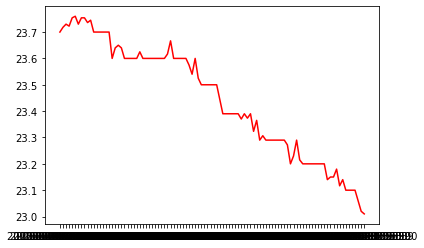

In [37]:
#ejemplo4
ocupacion = pd.read_csv("datatest.txt")[:100] #que cargue 100 rows solo
plt.plot(ocupacion['date'], ocupacion['Temperature'],'r-') #eje X, eje Y, color a usar
plt.show()

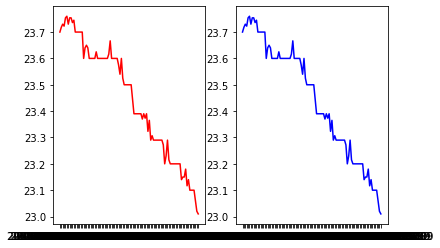

In [42]:
#ejemplo5: subplots
plt.subplot(1,2,1) #cuantas filas, cuantas columnas, indice donde empezar. Row1, Column2, Position1
plt.plot(ocupacion['date'], ocupacion['Temperature'],'r-')

plt.subplot(1,2,2) #cuantas filas, cuantas columnas, indice donde empezar. Row1, Column2, Position2
plt.plot(ocupacion['date'], ocupacion['Temperature'],'b-')
plt.show()

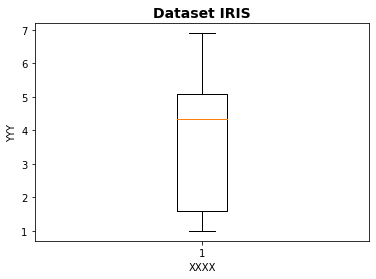

In [52]:
##BOXPLOTS and SUBPLOTTING

iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

iris['species'] = iris['species'].astype('category')
iris['species'] = iris['species'].cat.codes

figura = plt.figure()
grafico1 = figura.add_subplot(1,1,1) #una fila, una columna, primera posicion

grafico1.boxplot(iris["petal_length"])
grafico1.set_title("Dataset IRIS", fontsize=14, fontweight='bold')
grafico1.set_xlabel("XXXX")
grafico1.set_ylabel("YYY")

plt.show()

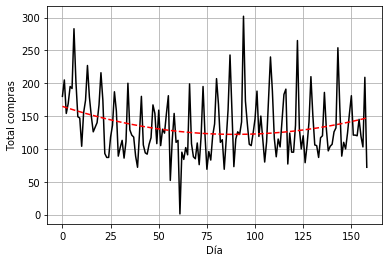

In [75]:
##PLOTTING REAL DATA

#datos de https://www.kaggle.com/sulmansarwar/transactions-from-a-bakery

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mi_dataset = pd.read_csv('BreadBasket_DMS.csv')
mi_dataset = mi_dataset.groupby(['Date']).agg(['count']) #agrupo el total de transaciones (count) por día (date)

x = range(len(mi_dataset.index)) #lista de dias
yVals = [] #lista vacia

#creamos una nueva columna para guardar cuantas transaciones en total se hicieron ese día
[yVals.append(row[0]) for ind,row in mi_dataset["Transaction"].iterrows()] #si se cumple el for ejecutará lo que este a su izquierda

grafico = np.polyfit(x,yVals,2) #2 es el 'tipo de curva'
grafico_fn = np.poly1d(grafico)

plt.subplots()
plt.plot(x, yVals, '-k', x, grafico_fn(x), '--r')
plt.locator_params(axis='x', nbins=8) #cuantos valores apareceran en el eje X, en este caso 8
plt.ylabel("Total compras")
plt.xlabel("Día")
plt.grid() #que pinte rejilla
plt.show()



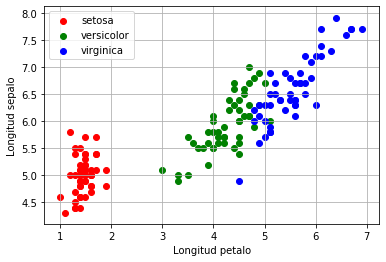

In [104]:
##PROBLEMA

import pandas as pd
import matplotlib.pyplot as plt

iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
#iris[:5] #para comprobar que carga bien le pedimos las 5 primeas rows
dataFrame = iris[["petal_length","sepal_length","species"]]

figura = plt.figure() # con plt.figure(figsize = (8,8)) cambiariamos el tamaño del grafico a 8x8
grafico = figura.add_subplot()
grafico.set_xlabel('Longitud petalo')
grafico.set_ylabel('Longitud sepalo')
especies = ['setosa', 'versicolor', 'virginica'] #hay que poner las especies que de verdad existen
colores = ['r','g','b']
for target, color in zip(especies, colores):
    indices = dataFrame['species'] == target #para cada row buscara si en species pone setosa, versicolor ó virginica si es asi 
    #print(indices) # para comprobar en que rows pone True o False
    grafico.scatter(df.loc[indices, 'petal_length'], df.loc[indices, 'sepal_length'], c=color) #si es true (es setosa, versicolor ó virginica) localiza la longitud de sepalo y petalo
grafico.legend(especies)
grafico.grid()